# <center><font color="#0066cc">Gym Routine Case </center></font>
## <center><font color="#003399">Análise Exploratória de Dados e Modelo de Classificação</center></font>
#### <center><font color="##003399"> Curso de Data Science Coderhouse</center></font>

### <center></font> [LinkedIn](https://www.linkedin.com/in/joaovictorlopes1998/) [Github](https://github.com/iamjoaovictorlopes)</center>



### <font color="#003399">Sumário</font>

#### [• Análise Exploratória de Dados](#analise-exploratoria)
#### [• Modelos de Classificação:](#modelos-classificacao) [Random Forest](#random-forest) | [ Decision Tree](#decision-tree)
#### [• Performance entre Modelos](#performance-modelos)
#### [• Modelo de Regressão](#modelo-regressao)

### <a id="analise-exploratoria"><center><font color="#003399">Análise Exploratória de Dados </center></font></a>

#### <font color="#003399">Importação das bibliotecas</color>

In [382]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics

import datetime
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(42)

#### <font color="#003399">Carregamento dos dados</color>

In [383]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [384]:
#Tradução das colunas para português pt-br
colunas = ['Idade', 
           'Gênero', 
           'Peso (kg)', 
           'Altura (m)', 
           'Max BPM', 
           'Média BPM', 
           'Repouso BPM', 
           'Duração Sessão (horas)', 
           'Calorias queimadas',
           'Tipo de Treino',
           'Percentual de Gordura',
           'Ingestão de Água (litro)',
           'Frequência de Treino (dia/semana)',
           'Nível de Experiência',
           'IMC'
]
data.columns = colunas

#### <font color="#003399">Colunas</color>
<font color="#0066cc">Idade: Idade do membro da academia <br>
Gênero: Gênero do frequentador da academia (Masculino ou Feminino) <br>
Peso (kg): Peso do membro em quilogramas <br>
Altura (m): Altura do membro em metros <br>
Max BPM: Frequência cardíaca máxima (batimentos por minuto) durante as sessões de treino <br>
Média BPM: Frequência cardíaca média durante sessões de treino <br>
Repouso BPM: Frequência cardíaca em repouso antes do treino <br>
Duração Sessão (horas): Duração de cada sessão de treino em horas <br>
Calorias queimadas: Total de calorias queimadas durante cada sessão <br>
Tipo de Treino: Tipo de treino realizado (por exemplo, Cardio, Força, Yoga, HIIT) <br>
Percentual de Gordura: percentual de gordura corporal do membro <br>
Ingestão de Água (litro): Ingestão diária de água durante os treinos <br>
Frequência de Treino (dia/semana): Número de sessões de treino por semana <br></font>
<font color="#0066cc"> Nível de Experiência: Nível de experiência, de iniciante (1) a especialista (3)</font> <font color="red"> Será nosso target de classificação futuramente ⚠️<br></font>
<font color="#0066cc">IMC: Índice de Massa Corporal, calculado a partir da altura e do peso <br></font>

In [385]:
data.head()

,Idade,Gênero,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Tipo de Treino,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [386]:
data.shape[0]

print("Temos {} linhas e {} colunas no dataset.".format(data.shape[0], data.shape[1]))

Temos 973 linhas e 15 colunas no dataset.


#### <font color="#003399">Limpeza de dados</color>

In [387]:
# Informações sobre os atributos do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Idade                              973 non-null    int64  
 1   Gênero                             973 non-null    object 
 2   Peso (kg)                          973 non-null    float64
 3   Altura (m)                         973 non-null    float64
 4   Max BPM                            973 non-null    int64  
 5   Média BPM                          973 non-null    int64  
 6   Repouso BPM                        973 non-null    int64  
 7   Duração Sessão (horas)             973 non-null    float64
 8   Calorias queimadas                 973 non-null    float64
 9   Tipo de Treino                     973 non-null    object 
 10  Percentual de Gordura              973 non-null    float64
 11  Ingestão de Água (litro)           973 non-null    float64

* Não existem valores nulos

#### <font color="#003399">Conhecendo nossos dados</color>

#### <font color="#003399">Iniciando pelos dados categóricos</color>

In [388]:
data.select_dtypes(include=object).columns.values

array(['Gênero', 'Tipo de Treino'], dtype=object)

In [389]:
# Distribuição por Gênero e Tipo de Treino
data.groupby(['Gênero','Tipo de Treino']).size()

Gênero  Tipo de Treino
Female  Cardio            126
        HIIT              107
        Strength          123
        Yoga              106
Male    Cardio            129
        HIIT              114
        Strength          135
        Yoga              133
dtype: int64

#### <font color="#003399">Medidas estatísticas sobre os dados numéricos</color>

In [390]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Peso (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Altura (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Média BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Repouso BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Duração Sessão (horas),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calorias queimadas,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Percentual de Gordura,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Ingestão de Água (litro),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [391]:
# Configurando preferências de cores
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})  # Definindo a cor de fundo dos gráficos
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#### <font color="#003399">Alguns questionamentos sobre nossos dados</color>

<Axes: xlabel='Nível de Experiência', ylabel='Calorias queimadas'>

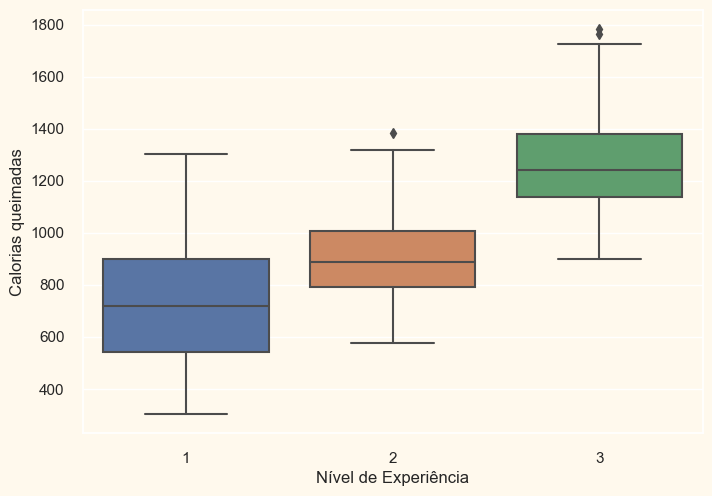

In [392]:
# O nível de experiência influencia nas calorias queimadas?
sns.boxplot(data=data, x='Nível de Experiência', y='Calorias queimadas')

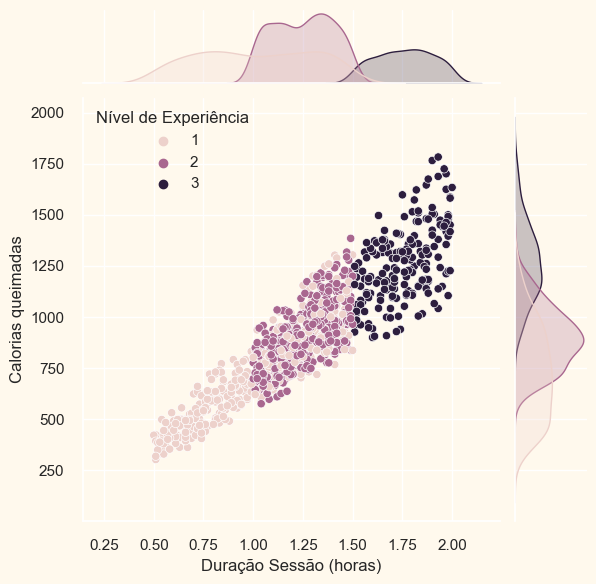

In [393]:
# A duração influencia nas calorias queimadas? O nível de experiência influencia na duração?
sns.jointplot(data=data, x='Duração Sessão (horas)', y='Calorias queimadas', hue='Nível de Experiência')

<Axes: xlabel='Frequência de Treino (dia/semana)', ylabel='Count'>

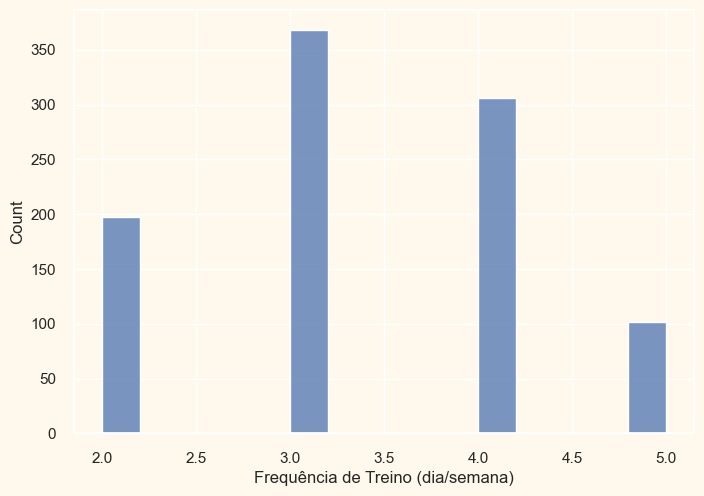

In [394]:
# Como está distribuída a frequência de treino?
sns.histplot(data=data, x='Frequência de Treino (dia/semana)')

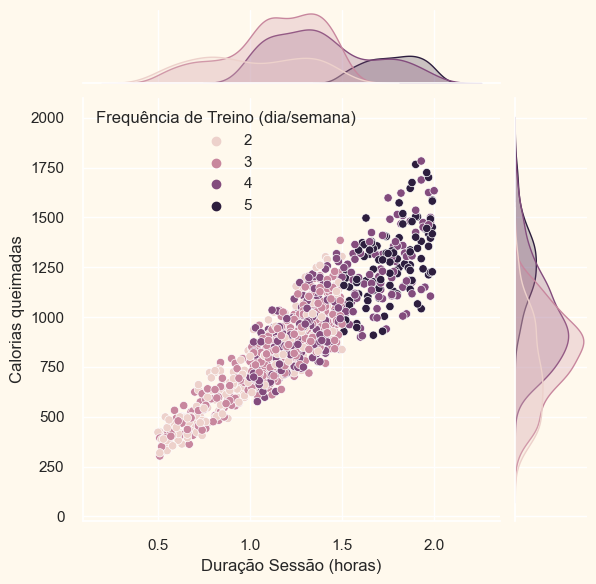

In [395]:
# Pessoas que vão mais à academia, possuem treinos mais longos e queimam mais calorias?
sns.jointplot(data=data, x='Duração Sessão (horas)', y='Calorias queimadas', hue='Frequência de Treino (dia/semana)')

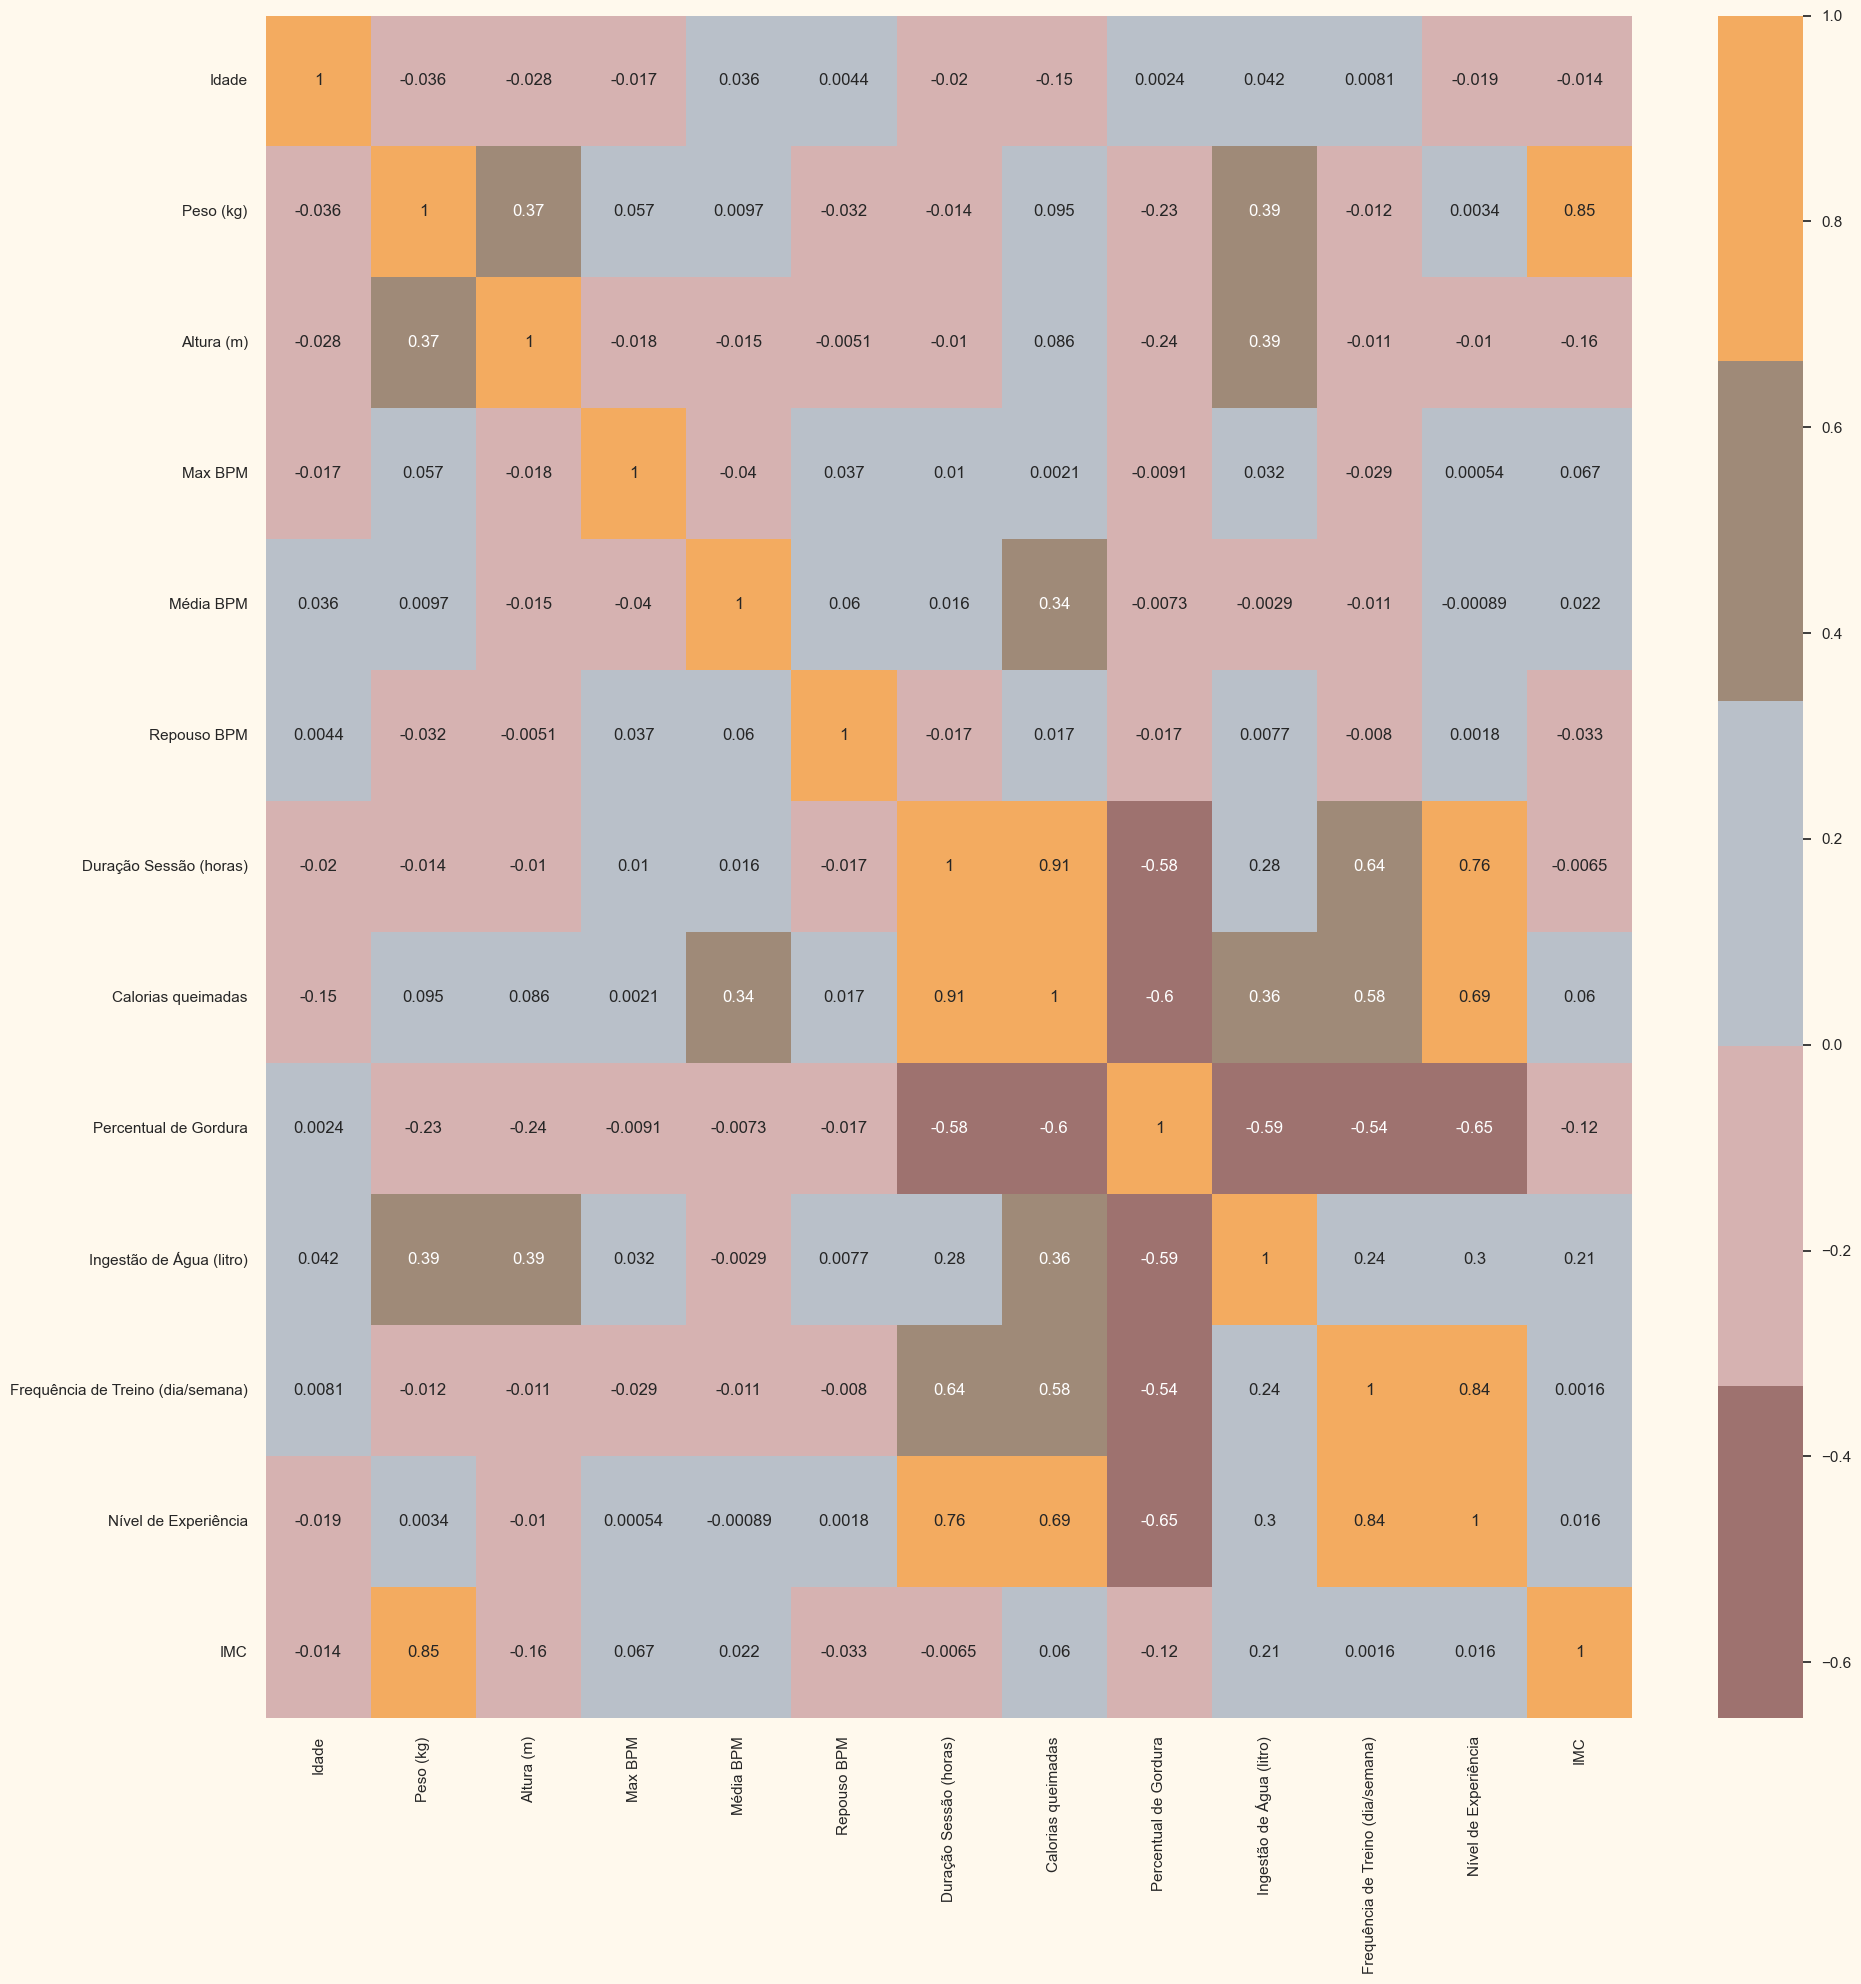

In [396]:
# Matriz de correlação
corrmat = data.corr()  # Calcula a matriz de correlação entre as variáveis numéricas
plt.figure(figsize=(20, 20))  # Define o tamanho do gráfico

# Cria o mapa de calor para visualizar as correlações
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.tight_layout()
plt.show()

### <a id="modelos-classificacao"><center><font color="#003399">Modelos de Classificação </center></font></a>

#### <font color="#003399">Pré-processamento de Dados</color>

In [397]:
data_original = data.copy()

In [398]:
#Selecionando as colunas que são variáveis categóricas
data.select_dtypes(include=['object'])

,Gênero,Tipo de Treino
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength
...,...,...
968,Male,Strength
969,Male,Strength
970,Female,Cardio
971,Male,HIIT


In [399]:
label_encoder = LabelEncoder()

In [400]:
data['Gênero_tratado'] = label_encoder.fit_transform(data['Gênero'])

In [401]:
from sklearn.preprocessing import OneHotEncoder
pd.get_dummies(data, columns=['Gênero'])

,Idade,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Tipo de Treino,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC,Gênero_tratado,Gênero_Female,Gênero_Male
0,56,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,1,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0,1,0
2,32,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,0,1,0
3,25,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,1,0,1
4,38,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,1,0,1
969,25,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,1,0,1
970,59,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,0,1,0
971,32,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,1,0,1


In [402]:
data['Tipo_Treino_tratado'] = label_encoder.fit_transform(data['Tipo de Treino'])
data.head()

,Idade,Gênero,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Tipo de Treino,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC,Gênero_tratado,Tipo_Treino_tratado
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,1,3
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0,1
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,0,0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,1,2
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,1,2


In [403]:
data.drop(columns=['Gênero', 'Tipo de Treino'], inplace=True, errors='ignore')

In [404]:
data['Nível de Experiência'].value_counts()

2    406
1    376
3    191
Name: Nível de Experiência, dtype: int64

#### <font color="#003399">Normalização e padronização dos dados</color>

In [405]:
from sklearn.preprocessing import StandardScaler

dados_padronizados = data.copy()
colunas_numericas = dados_padronizados.select_dtypes(include=['float64', 'int64', 'int32']).columns

scaler = StandardScaler()
dados_padronizados[colunas_numericas] = scaler.fit_transform(dados_padronizados[colunas_numericas])

dados_padronizados.head()

,Idade,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC,Gênero_tratado,Tipo_Treino_tratado
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.743295,1.609784,0.794278,0.950847,1.338485
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,0.743295,0.257176,1.064652,-1.051694,-0.439462
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,0.743295,0.257176,-0.030361,-1.051694,-1.328435
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,0.950847,0.449512
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-0.352502,-1.095432,-1.580503,0.950847,0.449512


In [406]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados_normalizados = dados_padronizados.copy()
dados_normalizados[colunas_numericas] = scaler.fit_transform(dados_normalizados[colunas_numericas])
dados_normalizados.head()

,Idade,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC,Gênero_tratado,Tipo_Treino_tratado
0,0.926829,0.537264,0.42,0.512821,0.755102,0.416667,0.793333,0.682432,0.104,0.909091,0.666667,1.0,0.476546,1.0,1.000000
1,0.682927,0.388209,0.06,0.487179,0.632653,0.666667,0.533333,0.391892,0.956,0.272727,0.666667,0.5,0.524520,0.0,0.333333
2,0.341463,0.312570,0.32,0.179487,0.040816,0.166667,0.406667,0.252703,0.936,0.363636,0.666667,0.5,0.330224,0.0,0.000000
3,0.170732,0.146830,0.40,0.769231,0.897959,0.250000,0.060000,0.154730,0.752,0.272727,0.333333,0.0,0.162313,1.0,0.666667
4,0.487805,0.067853,0.58,0.717949,0.775510,0.750000,0.093333,0.170946,0.768,0.590909,0.333333,0.0,0.055171,1.0,0.666667


In [407]:
### puxando dados para Regressão
y_reg = data['Calorias queimadas']
X_reg = dados_normalizados.drop('Calorias queimadas', axis=1)

In [408]:
#Selecionando nossa target
y = data['Nível de Experiência']
X = dados_normalizados.drop('Nível de Experiência', axis=1)

In [409]:
#Separando entre dataset de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <a id="random-forest"><center><font color="#003399">Modelo de Classificação: RandomForest</color></a></center>

In [410]:
#Treinando o modelo RandomForest
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=42)

modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [411]:
y_pred = modelo.predict(X_test)

In [412]:
#Dados utilizados para predict
X_test.head()

,Idade,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),IMC,Gênero_tratado,Tipo_Treino_tratado
199,0.390244,0.354839,0.28,0.256410,0.285714,0.708333,0.506667,0.422973,0.452,0.272727,0.666667,0.384062,1.0,0.000000
538,0.731707,0.488320,0.64,0.410256,0.591837,0.833333,0.933333,0.741892,0.124,0.909091,1.000000,0.346748,1.0,0.333333
174,0.756098,0.436040,0.44,0.871795,0.163265,0.791667,0.640000,0.420270,0.796,0.818182,0.333333,0.385128,1.0,1.000000
464,0.292683,0.310345,0.50,0.512821,0.979592,0.708333,0.500000,0.575676,0.764,0.727273,0.000000,0.262527,1.0,1.000000
66,0.341463,0.510567,0.20,0.410256,0.510204,0.416667,0.993333,0.867568,0.180,0.909091,1.000000,0.565832,1.0,0.333333


In [413]:
#Trazendo os dados originais dos dados utilizados para predict
data_filtrada = data_original.loc[X_test.index]
data_filtrada.head()

,Idade,Gênero,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Tipo de Treino,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC
199,34,Male,71.9,1.64,170,134,67,1.26,929.0,Cardio,21.3,2.1,4,2,26.73
538,48,Male,83.9,1.82,176,149,70,1.90,1401.0,HIIT,13.1,3.5,5,3,25.33
174,49,Male,79.2,1.72,194,128,69,1.46,925.0,Yoga,29.9,3.3,3,1,26.77
464,30,Male,67.9,1.75,180,168,67,1.25,1155.0,Yoga,29.1,3.1,2,1,22.17
66,32,Male,85.9,1.60,176,145,60,1.99,1587.0,HIIT,14.5,3.5,5,3,33.55


In [414]:
#Trazendo Y real e Y Predict
data_filtrada['Nível de Experiência Previsto'] = y_pred
data_filtrada.head()

,Idade,Gênero,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Tipo de Treino,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC,Nível de Experiência Previsto
199,34,Male,71.9,1.64,170,134,67,1.26,929.0,Cardio,21.3,2.1,4,2,26.73,2
538,48,Male,83.9,1.82,176,149,70,1.90,1401.0,HIIT,13.1,3.5,5,3,25.33,3
174,49,Male,79.2,1.72,194,128,69,1.46,925.0,Yoga,29.9,3.3,3,1,26.77,2
464,30,Male,67.9,1.75,180,168,67,1.25,1155.0,Yoga,29.1,3.1,2,1,22.17,1
66,32,Male,85.9,1.60,176,145,60,1.99,1587.0,HIIT,14.5,3.5,5,3,33.55,3


In [415]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [416]:
#Acurácia do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9128205128205128


In [417]:
classification_report(y_test, y_pred, output_dict=True)

{'1': {'precision': 0.9420289855072463,
  'recall': 0.8333333333333334,
  'f1-score': 0.8843537414965987,
  'support': 78},
 '2': {'precision': 0.8452380952380952,
  'recall': 0.9466666666666667,
  'f1-score': 0.8930817610062893,
  'support': 75},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 42},
 'accuracy': 0.9128205128205128,
 'macro avg': {'precision': 0.9290890269151139,
  'recall': 0.9266666666666667,
  'f1-score': 0.9258118341676292,
  'support': 195},
 'weighted avg': {'precision': 0.917287784679089,
  'recall': 0.9128205128205128,
  'f1-score': 0.9126190969856738,
  'support': 195}}

In [418]:
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
display(df_classification_report)

,precision,recall,f1-score,support
1,0.942029,0.833333,0.884354,78.000000
2,0.845238,0.946667,0.893082,75.000000
3,1.000000,1.000000,1.000000,42.000000
accuracy,0.912821,0.912821,0.912821,0.912821
macro avg,0.929089,0.926667,0.925812,195.000000
weighted avg,0.917288,0.912821,0.912619,195.000000


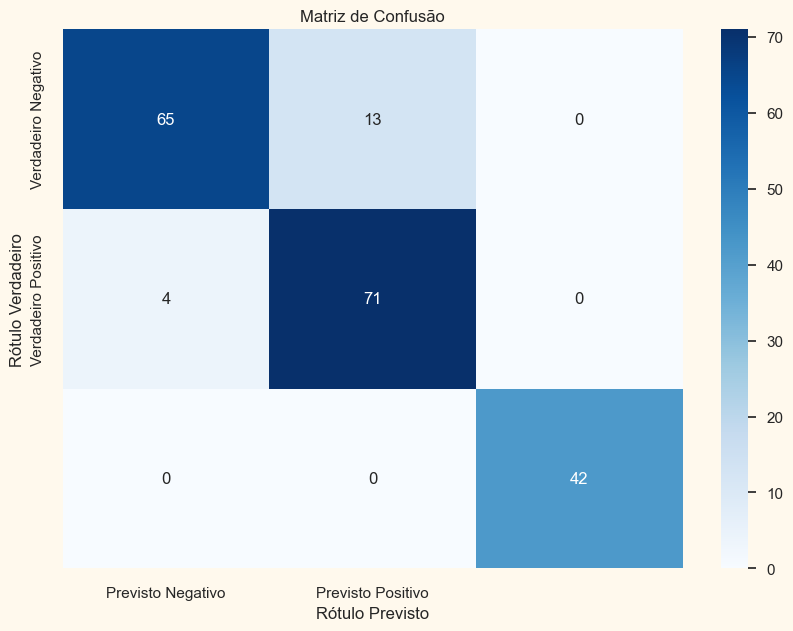

In [419]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto Negativo', 'Previsto Positivo'], yticklabels=['Verdadeiro Negativo', 'Verdadeiro Positivo'])
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### <center><a id="decision-tree"><font color="#003399">Modelo de Classificação: Decision Tree</color></a></center>

In [420]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

encoder = LabelEncoder()
encoder.fit(['1', '2', '3'])
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(pd.DataFrame(matriz_confusao, index=encoder.classes_, columns=encoder.classes_))


Acurácia: 0.882051282051282

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.87      0.86        78
           2       0.86      0.83      0.84        75
           3       1.00      1.00      1.00        42

    accuracy                           0.88       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.88      0.88      0.88       195


Matriz de Confusão:
    1   2   3
1  68  10   0
2  13  62   0
3   0   0  42


### <center><a id="performance-modelos"><font color="#003399">Comparativo de performance entre os dois modelos</color></a></center>

In [421]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

class_names = encoder.classes_  # Obtém os nomes das classes

# Inicializando os modelos
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Treinando os modelos
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Avaliando o desempenho dos modelos
print("== Decision Tree ==")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))
print("\nMatriz de Confusão:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_dt), index=class_names, columns=class_names))

print("\n== Random Forest ==")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rf), index=class_names, columns=class_names))


== Decision Tree ==
Acurácia: 0.882051282051282

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.87      0.86        78
           2       0.86      0.83      0.84        75
           3       1.00      1.00      1.00        42

    accuracy                           0.88       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.88      0.88      0.88       195


Matriz de Confusão:
    1   2   3
1  68  10   0
2  13  62   0
3   0   0  42

== Random Forest ==
Acurácia: 0.9128205128205128

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.94      0.83      0.88        78
           2       0.85      0.95      0.89        75
           3       1.00      1.00      1.00        42

    accuracy                           0.91       195
   macro avg       0.93      0.93      0.93       195
weighted avg       0.92      0.91      0.91       195


Matr

### <center><a id="modelo-regressao"><font color="#003399">Modelo de Regressão</color></a></center>
#### Necessário melhorar tratamento dos dados

In [422]:
### puxando dados para Regressão
y_reg = data['Calorias queimadas']
X_reg = dados_normalizados.drop('Calorias queimadas', axis=1)

In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [425]:
modelo = LinearRegression()

In [426]:
modelo.fit(X_train, y_train)

LinearRegression()

In [427]:
y_pred = modelo.predict(X_test)

In [428]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Regressão Linear - MSE: {mse:.2f}, R²: {r2:.2f}")

Regressão Linear - MSE: 1639.91, R²: 0.98


## Interpretação de MSE e R²

### MSE (Erro Quadrático Médio)
O **MSE** nos mostra o quão longe, em média, as previsões do modelo estão dos valores reais. Quanto menor o MSE, melhor. Um MSE de 0 significaria que o modelo sempre acerta as previsões, o que é o ideal.

Pense no MSE como uma medida de "erros médios": se o valor for alto, quer dizer que o modelo está errando bastante; se for baixo, ele está acertando mais.

### R² (Coeficiente de Determinação)
O **R²** nos diz o quão bem o modelo explica ou se ajusta aos dados. Ele varia de 0 a 1 (ou de 0% a 100%). Um R² de 1 significa que o modelo explica perfeitamente as variações nos dados, enquanto um valor próximo de 0 indica que ele não está explicando bem.

De forma simples, o R² indica a qualidade do modelo em "capturar" o comportamento dos dados. Um valor mais alto é sempre melhor, pois significa que o modelo está mais "em sintonia" com os dados reais.


In [429]:
modelos = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

In [430]:
for nome_modelo, modelo in modelos.items():
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"Modelo {nome_modelo} - MSE : {mse:.2f}, R²: {r2:.2f}")

Modelo LinearRegression - MSE : 1639.91, R²: 0.98
Modelo DecisionTreeRegressor - MSE : 4594.69, R²: 0.94
Modelo RandomForestRegressor - MSE : 2224.07, R²: 0.97
